/var/folders/s9/b_v28th131z83pcy_r7l03lc0000gn/T/ipykernel_84491/2082231926.py:14: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backend.mps.is_available()) and ALLOW_MPS:


Using device mps


100%|██████████| 50/50 [00:51<00:00,  1.02s/it]


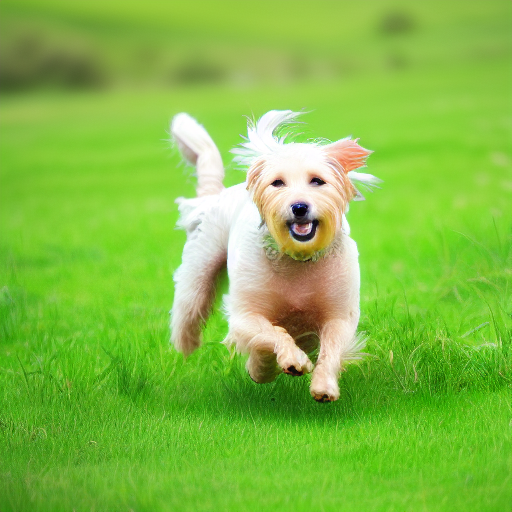

In [ ]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = 'cpu'

ALLOW_CUDA = False
ALLOW_MPS = True # False if you want to use cpu

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = 'cuda'
elif (torch.backend.mps.is_available()) and ALLOW_MPS:
    DEVICE = 'mps'
print(f'Using device {DEVICE}')

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# TEXT TO IMAGE

prompt = "A blond dog running in green grass, highly detailed, ultra cinematic, 8k resolution" # Add prompt here
uncond_prompt = "" # Can use as a negative prompt
do_cfg = True
cfg_scale = 9

## IMAGE TO IMAGE

input_image = None
image_path = "" # Add image here
if image_path:
    input_image = Image.open(image_path)
strength = 0.9

sampler = 'ddpm'
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device='cpu',
    tokenizer=tokenizer
)

Image.fromarray(output_image)